# Breast Cancer Wisconsin (Diagnostic) Data Set

## Predict whether the cancer is benign or malignant

### Description

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)\
b) texture (standard deviation of gray-scale values)\
c) perimeter\
d) area\
e) smoothness (local variation in radius lengths)\
f) compactness (perimeter^2 / area - 1.0)\
g) concavity (severity of concave portions of the contour)\
h) concave points (number of concave portions of the contour)\
i) symmetry\
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Exploring the Dataset

## Libraries & Importing Data

In [1]:
# Data exploration / cleaning / ploting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [2]:
bcan = pd.read_csv('../data/breast_cancer_wisconsin.csv')

In [3]:
bcan_copy = bcan.copy()

## Exploring 

In [4]:
bcan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
bcan.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
bcan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
bcan.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


<AxesSubplot:>

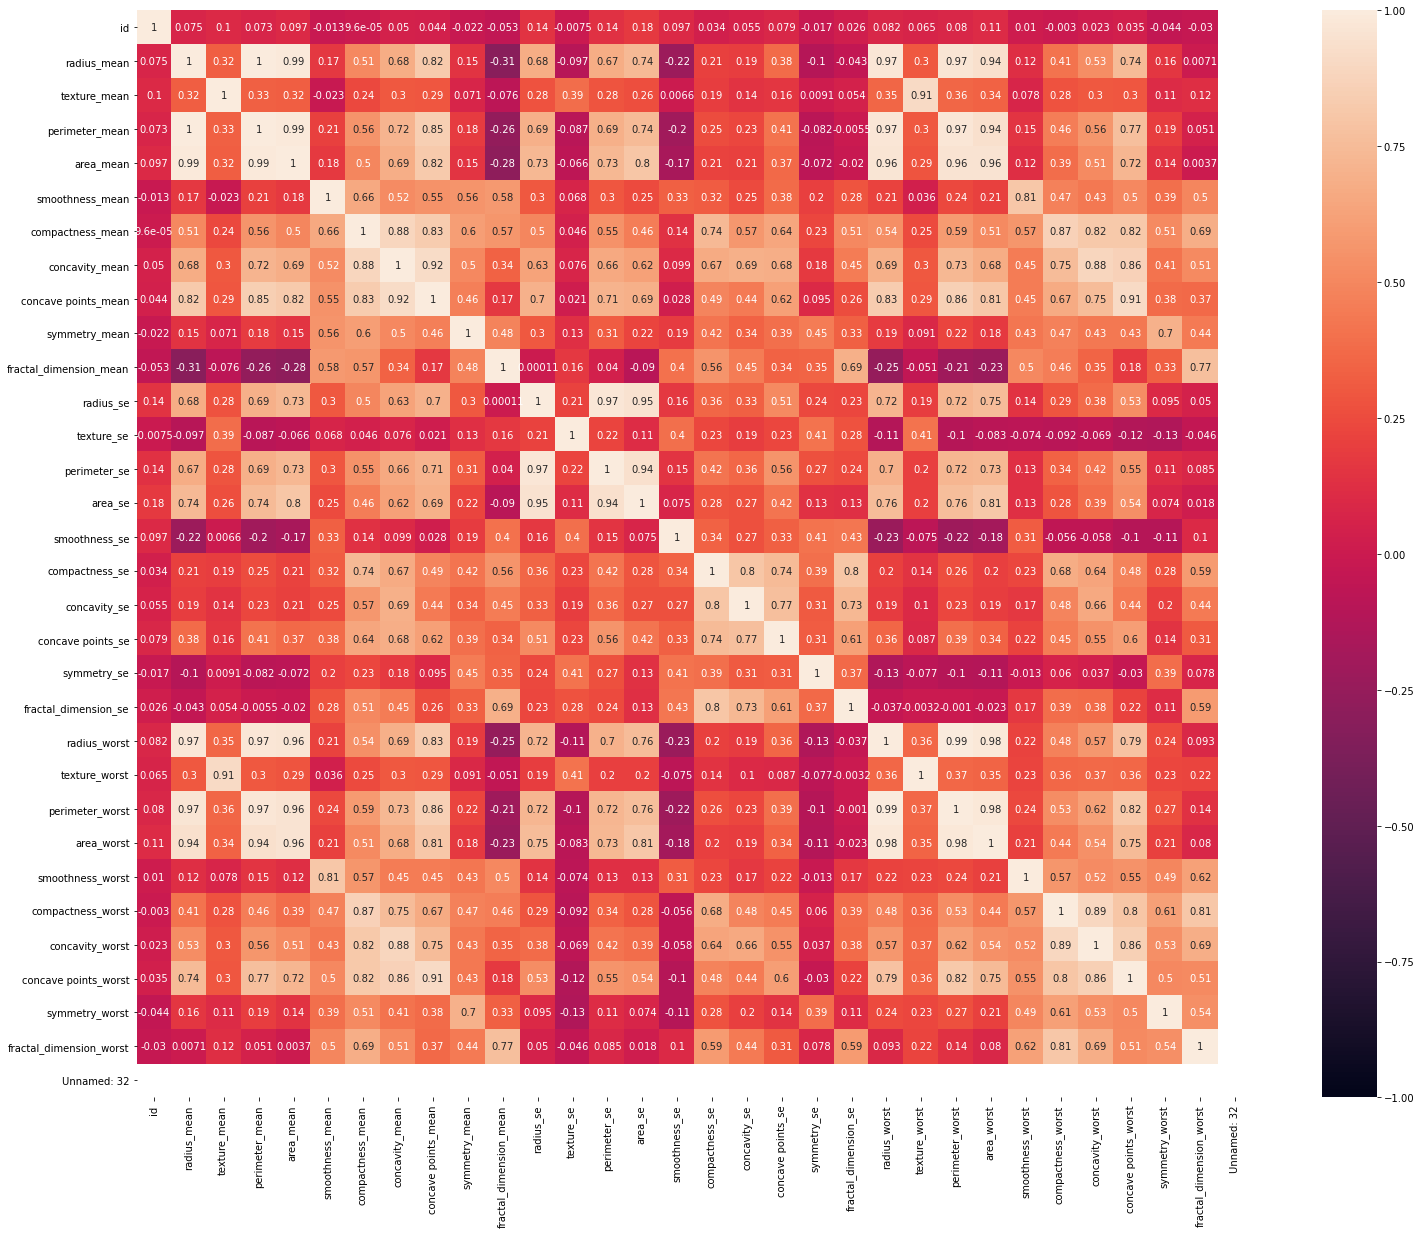

In [8]:
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(bcan.corr(),annot=True,vmin=-1, vmax=1)

In [9]:
bcan.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
bcan['Unnamed: 32'].value_counts()

Series([], Name: Unnamed: 32, dtype: int64)

In [11]:
bcan['Unnamed: 32'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 32, dtype: float64

In [12]:
bcan['id'].value_counts()

883263     1
906564     1
89122      1
9013579    1
868682     1
          ..
874158     1
914062     1
918192     1
872113     1
875878     1
Name: id, Length: 569, dtype: int64

<AxesSubplot:>

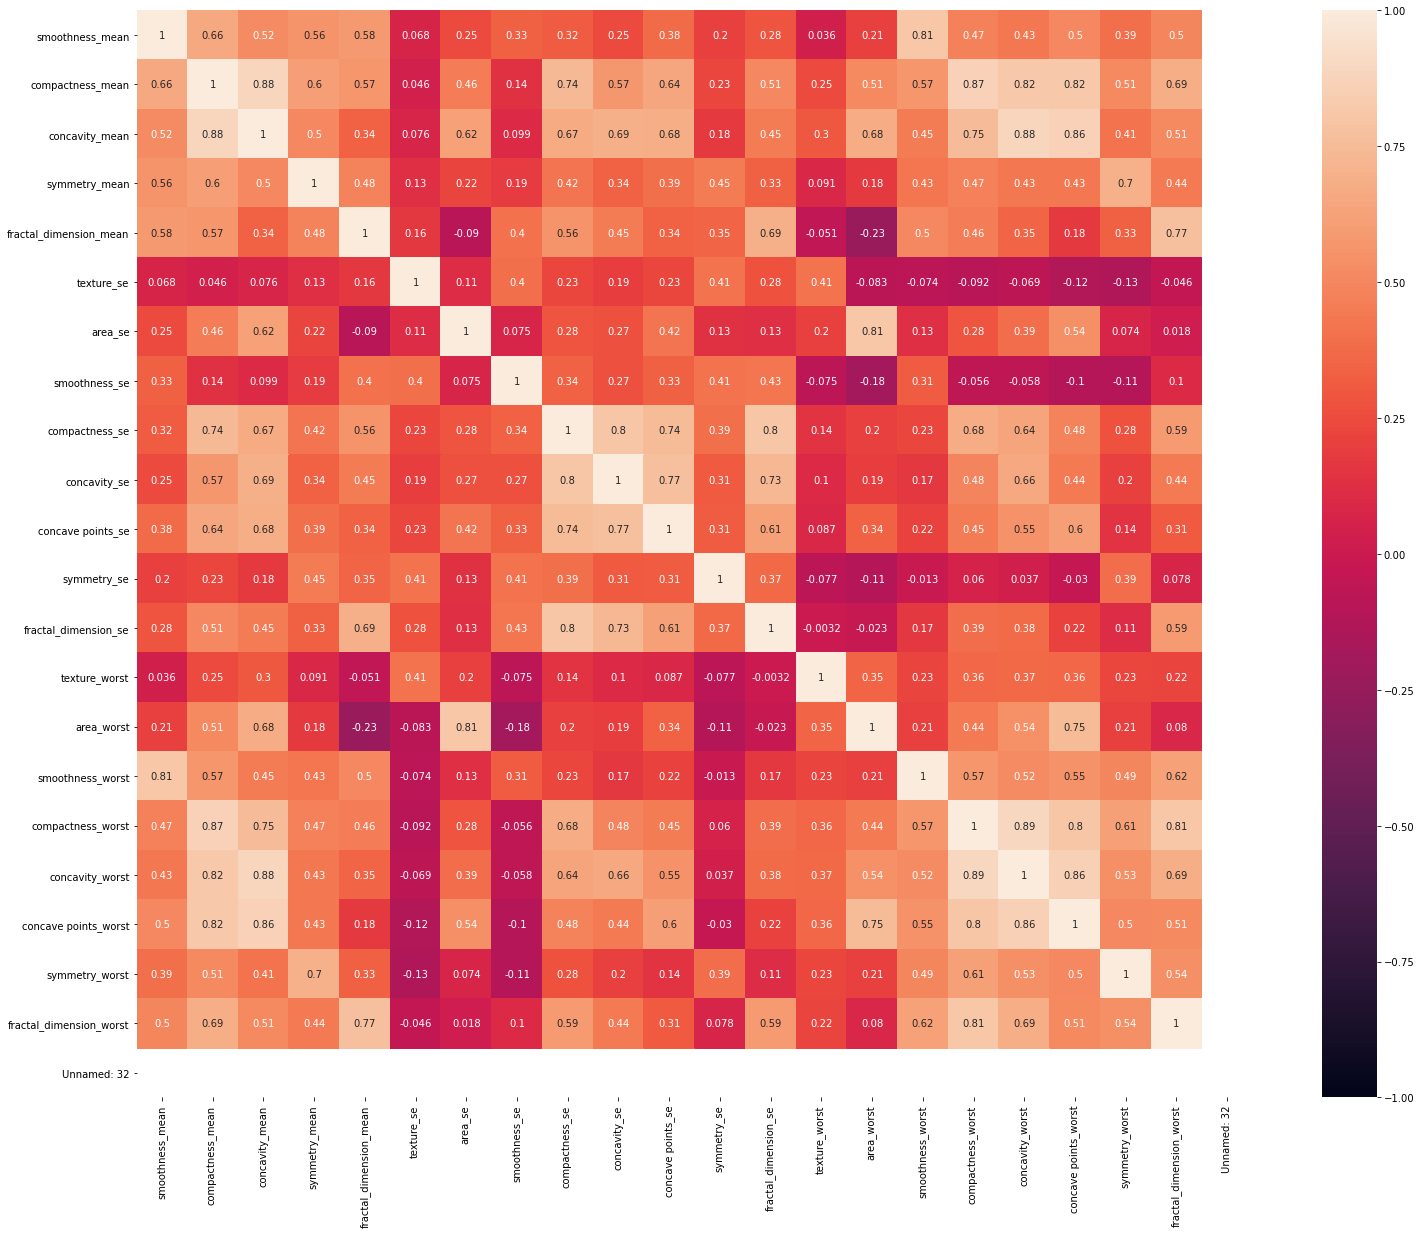

In [13]:
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(bcan.drop(columns=['radius_mean','area_mean','perimeter_mean','concave points_mean','radius_se','radius_worst','perimeter_se','perimeter_worst','id','texture_mean']).corr(),annot=True,vmin=-1, vmax=1)


# Data Cleaning

In [14]:
bcan = bcan.drop(columns=['id','Unnamed: 32','radius_mean','area_mean','perimeter_mean','concave points_mean','radius_se','radius_worst','perimeter_se','perimeter_worst','texture_mean'])
bcan


,diagnosis,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.11840,0.27760,0.30010,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,0.08474,0.07864,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,0.10960,0.15990,0.19740,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,0.14250,0.28390,0.24140,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,0.10030,0.13280,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.11100,0.11590,0.24390,0.1726,0.05623,1.2560,158.70,0.010300,0.02891,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,0.09780,0.10340,0.14400,0.1752,0.05533,2.4630,99.04,0.005769,0.02423,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,0.08455,0.10230,0.09251,0.1590,0.05648,1.0750,48.55,0.005903,0.03731,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,0.11780,0.27700,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.06158,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
bcan['diagnosis'] = np.where(bcan['diagnosis'] == 'M', 1, 0)
# M = 1 = Malignant
# B = 0 = Benign

In [16]:
bcan['diagnosis'].value_counts()/bcan.shape[0]*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

([<matplotlib.axis.XTick at 0x11d54a160>,
 [Text(0, 0, 'Benign'), Text(1, 0, 'Malignant')])

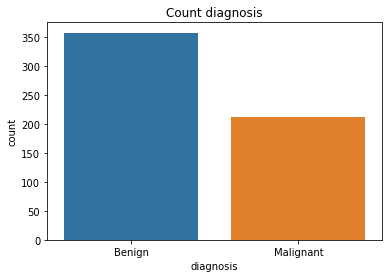

In [17]:
sns.countplot(data=bcan,x='diagnosis')
plt.title('Count diagnosis')
plt.xticks(range(2),['Benign', 'Malignant'])
# plt.savefig("Count diagnosis", dpi=700)

# Data Modeling & Predictions

## Preparation

In [18]:
X = bcan.drop(columns='diagnosis')
y = bcan['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1123)

stnd_scaler = StandardScaler()    # which scaler?
rob_scaler = RobustScaler()     # es util con outliers - ya q si hay minimisa el impacto.

stnd_scaler.fit(X_train)
rob_scaler.fit(X_train)

X_train_stnd_scaled = stnd_scaler.transform(X_train) 
X_test_stnd_scaled  = stnd_scaler.transform(X_test)

X_train_rob_scaled = rob_scaler.transform(X_train) 
X_test_rob_scaled  = rob_scaler.transform(X_test)


In [19]:
# def FeatureImportance (_model):
#    fi = pd.DataFrame({'feature': list(X_train.columns),
#                       'importance': _model.feature_importances_}).sort_values('importance', ascending = False)
#    return fi

## Logistic Regression

### Logistic Regression with StandardScaler

,Error_metric,Train,Test
0,Accuracy,0.986813,0.973684
1,Precision,0.988166,0.975000
2,Recall,0.976608,0.951220
3,Kappa,0.971827,0.942560


Confusion matrix for the train set
[[282   2]
 [  4 167]]


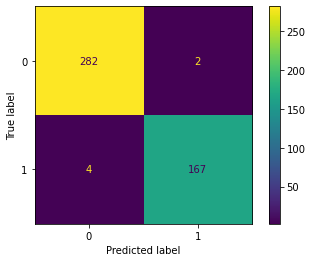



Confusion matrix for the test set
[[72  1]
 [ 2 39]]


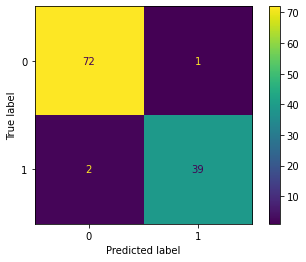

In [20]:
log_std = LogisticRegression()  # no hyper parameters

log_std.fit(X_train_stnd_scaled, y_train)

# StandardScaler
y_pred_train_log_std = log_std.predict(X_train_stnd_scaled)
y_pred_test_log_std = log_std.predict(X_test_stnd_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','Kappa'],
                               'Train': [accuracy_score(y_train, y_pred_train_log_std),
                                         precision_score(y_train, y_pred_train_log_std),
                                         recall_score(y_train, y_pred_train_log_std),
                                         cohen_kappa_score(y_train, y_pred_train_log_std)],
                               'Test': [accuracy_score(y_test, y_pred_test_log_std),
                                        precision_score(y_test, y_pred_test_log_std),
                                        recall_score(y_test, y_pred_test_log_std),
                                        cohen_kappa_score(y_test, y_pred_test_log_std)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train, y_pred_train_log_std))
plot_confusion_matrix(log_std, X_train_stnd_scaled, y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log_std))
plot_confusion_matrix(log_std, X_test_stnd_scaled, y_test, values_format = 'd')
# plt.savefig("ConfMatrix_Test_log_reg_std", dpi=700)
plt.show()

Conclusion:

Although the data isn't balanced, the model gives already very good results:

Best model is LogisticRegression

Recall	train:0.976600 test:0.951220

Confusion matrix for the test set gives only 3 errors, which is very good result.


### Logistic Regression with RobustScaler

,Error_metric,Train,Test
0,Accuracy,0.989011,0.973684
1,Precision,0.994048,0.975000
2,Recall,0.976608,0.951220
3,Kappa,0.976495,0.942560


Confusion matrix for the train set
[[283   1]
 [  4 167]]


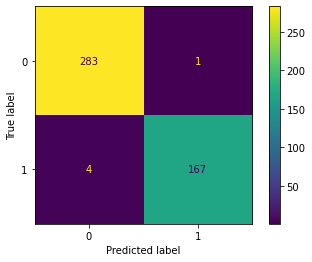



Confusion matrix for the test set
[[72  1]
 [ 2 39]]


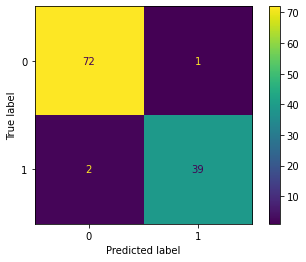

In [21]:
# Robustscaler

log_rob = LogisticRegression() 

log_rob.fit(X_train_rob_scaled, y_train)

y_pred_train_log_rob = log_rob.predict(X_train_rob_scaled)
y_pred_test_log_rob = log_rob.predict(X_test_rob_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','Kappa'],
                               'Train': [accuracy_score(y_train, y_pred_train_log_rob),
                                         precision_score(y_train, y_pred_train_log_rob),
                                         recall_score(y_train, y_pred_train_log_rob),
                                         cohen_kappa_score(y_train, y_pred_train_log_rob)],
                               'Test': [accuracy_score(y_test, y_pred_test_log_rob),
                                        precision_score(y_test, y_pred_test_log_rob),
                                        recall_score(y_test, y_pred_test_log_rob),
                                        cohen_kappa_score(y_test, y_pred_test_log_rob)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train, y_pred_train_log_rob))
plot_confusion_matrix(log_rob, X_train_rob_scaled, y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log_rob))
plot_confusion_matrix(log_rob, X_test_rob_scaled, y_test, values_format = 'd')
plt.show()

In [22]:
# trans = PowerTransformer()

# trans.fit(X_train)

# X_train_mod = trans.transform(X_train)
# X_test_mod  = trans.transform(X_test)

# X_train_stnd_scaled = stnd_scaler.transform(X_train) 
# X_test_stnd_scaled  = stnd_scaler.transform(X_test)

# X_train_rob_scaled = rob_scaler.transform(X_train) 
# X_test_rob_scaled  = rob_scaler.transform(X_test)

In [23]:
# GridSearch no tiene sentido por los parametros para el logReg / o Reglinear

### Logistic Regression Cross Validation

In [24]:
cross_validate(estimator=LogisticRegression(), X = X, y = y, cv = 10, scoring='recall')

{'fit_time': array([0.06183624, 0.04647183, 0.03417706, 0.04473519, 0.03406   ,
        0.03339791, 0.03208518, 0.04032993, 0.0445528 , 0.030267  ]),
 'score_time': array([0.00309682, 0.00266504, 0.00261712, 0.00254512, 0.00295186,
        0.00313902, 0.00386977, 0.0031333 , 0.00239801, 0.00327897]),
 'test_score': array([0.90909091, 0.86363636, 0.80952381, 0.9047619 , 1.        ,
        0.95238095, 0.9047619 , 1.        , 1.        , 0.95238095])}

In [25]:
cv= cross_validate(estimator=LogisticRegression(), X = X, y = y, cv = 10, scoring='recall')

cv['test_score'].mean()

0.9296536796536795

## KNN

### KNN with StandardScaler & Confusion Matrix

,Error_metric,Train,Test
0,Accuracy,0.958242,0.947368
1,Precision,0.975000,0.948718
2,Recall,0.912281,0.902439
3,Kappa,0.909840,0.884498


Confusion matrix for the train set
[[280   4]
 [ 15 156]]


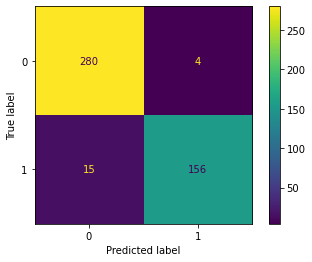



Confusion matrix for the test set
[[71  2]
 [ 4 37]]


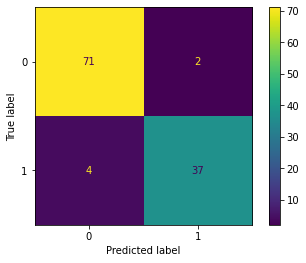

In [26]:
# initialize model (set parameters) with StandardScaler

knn = KNeighborsClassifier(n_neighbors=9) # n_neighbors = K

knn.fit(X_train_stnd_scaled, y_train)

# y_pred_train_knn = knn.predict(X_train)
# y_pred_test_knn  = knn.predict(X_test)

y_pred_train_knn_st = knn.predict(X_train_stnd_scaled)
y_pred_test_knn_st = knn.predict(X_test_stnd_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','Kappa'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn_st),
                                         precision_score(y_train, y_pred_train_knn_st),
                                         recall_score(y_train, y_pred_train_knn_st),
                                         cohen_kappa_score(y_train, y_pred_train_knn_st)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn_st),
                                        precision_score(y_test, y_pred_test_knn_st),
                                        recall_score(y_test, y_pred_test_knn_st),
                                        cohen_kappa_score(y_test, y_pred_test_knn_st)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn_st))
plot_confusion_matrix(knn, X_train_stnd_scaled,y_train, values_format = 'd')
plt.show()

print()
print()  

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn_st))
plot_confusion_matrix(knn, X_test_stnd_scaled, y_test, values_format = 'd')
plt.show()

### KNN with RobustScaler & Confusion Matrix

,Error_metric,Train,Test
0,Accuracy,0.964835,0.956140
1,Precision,0.987421,0.973684
2,Recall,0.918129,0.902439
3,Kappa,0.923986,0.903226


Confusion matrix for the train set
[[282   2]
 [ 14 157]]


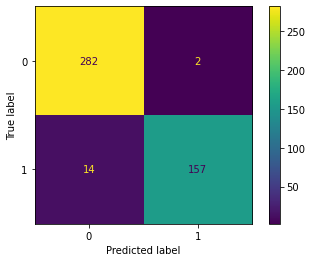



Confusion matrix for the test set
[[72  1]
 [ 4 37]]


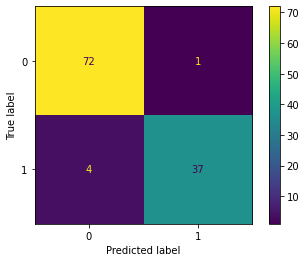

In [27]:
# initialize model (set parameters) with Robustscaler

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_rob_scaled, y_train)

y_pred_train_knn_rob = knn.predict(X_train_rob_scaled)
y_pred_test_knn_rob = knn.predict(X_test_rob_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','Kappa'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn_rob),
                                         precision_score(y_train, y_pred_train_knn_rob),
                                         recall_score(y_train, y_pred_train_knn_rob),
                                         cohen_kappa_score(y_train, y_pred_train_knn_rob)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn_rob),
                                        precision_score(y_test, y_pred_test_knn_rob),
                                        recall_score(y_test, y_pred_test_knn_rob),
                                        cohen_kappa_score(y_test, y_pred_test_knn_rob)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train, y_pred_train_knn_rob))
plot_confusion_matrix(knn, X_train_rob_scaled, y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn_rob))
plot_confusion_matrix(knn, X_test_rob_scaled, y_test, values_format = 'd')
plt.show()

### KNN GridSearchCV

In [28]:
# Gridsearch - it looks for the best option within the parameters that was given. 
# After that, it check with cross validation (cv - it with do random train/test/splits depending 
# on the amount of times - cv=10 I add - it generates a mean between the 10 diff cv it did, therefore more safe) 
# Do Gridsearch when many parameters, normal CV when not many parameters. it will give the best score how the 
# model will work without data.

In [29]:
#Playing with parameters / StandardScaler

neigh_mod = KNeighborsClassifier()

tree = GridSearchCV(neigh_mod,param_grid={'n_neighbors':list(range(1,100))},scoring='recall')

tree.fit(X_train_stnd_scaled,y_train)

print("Best number of neighbours = ",tree.best_estimator_)
print("Corresponding recall = ",round(tree.best_score_,3))

#tree.cv_results_

neigh_model = KNeighborsClassifier(n_neighbors=9)

# Best number of neighbours =  KNeighborsClassifier(n_neighbors=9)
# Corresponding recall =  0.907

Best number of neighbours =  KNeighborsClassifier(n_neighbors=9)
Corresponding recall =  0.907


In [30]:
#Playing with parameters / RobustScaler

neigh_mod = KNeighborsClassifier()

tree = GridSearchCV(neigh_mod,param_grid={'n_neighbors':list(range(1,100))},scoring='recall')

tree.fit(X_train_rob_scaled,y_train)

print("Best number of neighbours = ",tree.best_estimator_)
print("Corresponding recall = ",round(tree.best_score_,3))

#tree.cv_results_

neigh_model = KNeighborsClassifier(n_neighbors=9)

# Best number of neighbours =  KNeighborsClassifier(n_neighbors=3)
# Corresponding recall =  0.901

Best number of neighbours =  KNeighborsClassifier(n_neighbors=3)
Corresponding recall =  0.901


In [31]:
# Gridsearch - it looks for the best option within the parameters that was given. After that, it check with cross validation (cv - it with do random train/test/splits depending on the amount of times - cv=10 I add - it generates a mean between the 10 diff cv it did, therefore more safe) Do Gridsearch when many parameters, normal CV when not many parameters. it will give the best score how the model will work without data. 

In [32]:
# initialize model (no parameters)
neigh = KNeighborsClassifier()

# define grid search
neigh_search = GridSearchCV(estimator=neigh,
                            param_grid={"n_neighbors":range(2,21),
                                        "weights":["uniform", "distance"]},
                            scoring="recall",
                            cv=10)

In [33]:
neigh_search.fit(X_train_rob_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 21),
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [34]:
neigh_search.cv_results_

{'mean_fit_time': array([0.00164642, 0.00420623, 0.00114744, 0.00107858, 0.00122173,
        0.00103943, 0.00101976, 0.0010555 , 0.00102592, 0.00107548,
        0.00118825, 0.00111837, 0.00114281, 0.00107985, 0.00132463,
        0.00103004, 0.00112126, 0.00107965, 0.00122719, 0.00127406,
        0.00137672, 0.00111895, 0.00134642, 0.0010339 , 0.00122242,
        0.00106816, 0.00113614, 0.00124247, 0.00136211, 0.00103827,
        0.00107703, 0.00139558, 0.00110652, 0.00102758, 0.00102005,
        0.00129638, 0.00109117, 0.00100856]),
 'std_fit_time': array([8.70881340e-04, 6.75009151e-03, 3.68149879e-04, 1.25563386e-04,
        1.95791801e-04, 1.53863058e-04, 8.61390060e-05, 1.43452021e-04,
        1.12825909e-04, 1.51289747e-04, 2.37232415e-04, 3.02853818e-04,
        1.38877463e-04, 1.67955044e-04, 2.63230749e-04, 1.45797749e-04,
        2.13025725e-04, 1.66842800e-04, 2.25557202e-04, 4.29281531e-04,
        3.95514724e-04, 1.61711848e-04, 1.37694193e-04, 1.11722664e-04,
        2.604

In [35]:
neigh_search.best_score_

0.9179738562091504

In [36]:
neigh_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

## Decision Tree

### Decision Tree with StandardScaler

,Error_metric,Train,Test
0,Accuracy,0.973626,0.912281
1,Precision,0.993789,0.860465
2,Recall,0.935673,0.902439
3,Kappa,0.943124,0.811570


Confusion matrix for the train set
[[283   1]
 [ 11 160]]


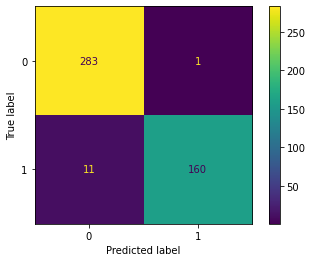



Confusion matrix for the test set
[[67  6]
 [ 4 37]]


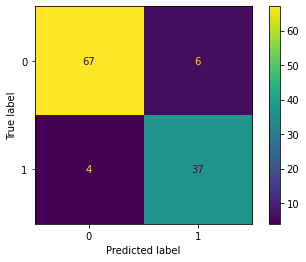

In [37]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train_stnd_scaled, y_train)

y_pred_train_dt_st = dt.predict(X_train_stnd_scaled)
y_pred_test_dt_st = dt.predict(X_test_stnd_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','Kappa'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt_st),
                                         precision_score(y_train, y_pred_train_dt_st),
                                         recall_score(y_train, y_pred_train_dt_st),
                                         cohen_kappa_score(y_train, y_pred_train_dt_st)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt_st),
                                        precision_score(y_test, y_pred_test_dt_st),
                                        recall_score(y_test, y_pred_test_dt_st),
                                        cohen_kappa_score(y_test, y_pred_test_dt_st)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train, y_pred_train_dt_st))
plot_confusion_matrix(dt, X_train_stnd_scaled, y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_dt_st))
plot_confusion_matrix(dt, X_test_stnd_scaled, y_test, values_format = 'd')
plt.show()

### Decision Tree with RobustScaler

,Error_metric,Train,Test
0,Accuracy,0.973626,0.903509
1,Precision,0.993789,0.857143
2,Recall,0.935673,0.878049
3,Kappa,0.943124,0.791625


Confusion matrix for the train set
[[283   1]
 [ 11 160]]


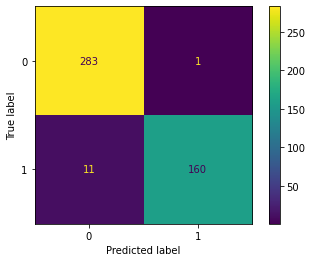



Confusion matrix for the test set
[[67  6]
 [ 5 36]]


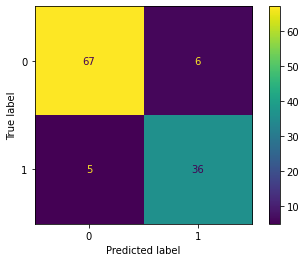

In [38]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train_rob_scaled, y_train)

y_pred_train_dt_rob = dt.predict(X_train_rob_scaled)
y_pred_test_dt_rob = dt.predict(X_test_rob_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','Kappa'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt_rob),
                                         precision_score(y_train, y_pred_train_dt_rob),
                                         recall_score(y_train, y_pred_train_dt_rob),
                                         cohen_kappa_score(y_train, y_pred_train_dt_rob)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt_rob),
                                        precision_score(y_test, y_pred_test_dt_rob),
                                        recall_score(y_test, y_pred_test_dt_rob),
                                        cohen_kappa_score(y_test, y_pred_test_dt_rob)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt_rob))
plot_confusion_matrix(dt,X_train_rob_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_dt_rob))
plot_confusion_matrix(dt,X_test_rob_scaled,y_test, values_format = 'd')
plt.show()

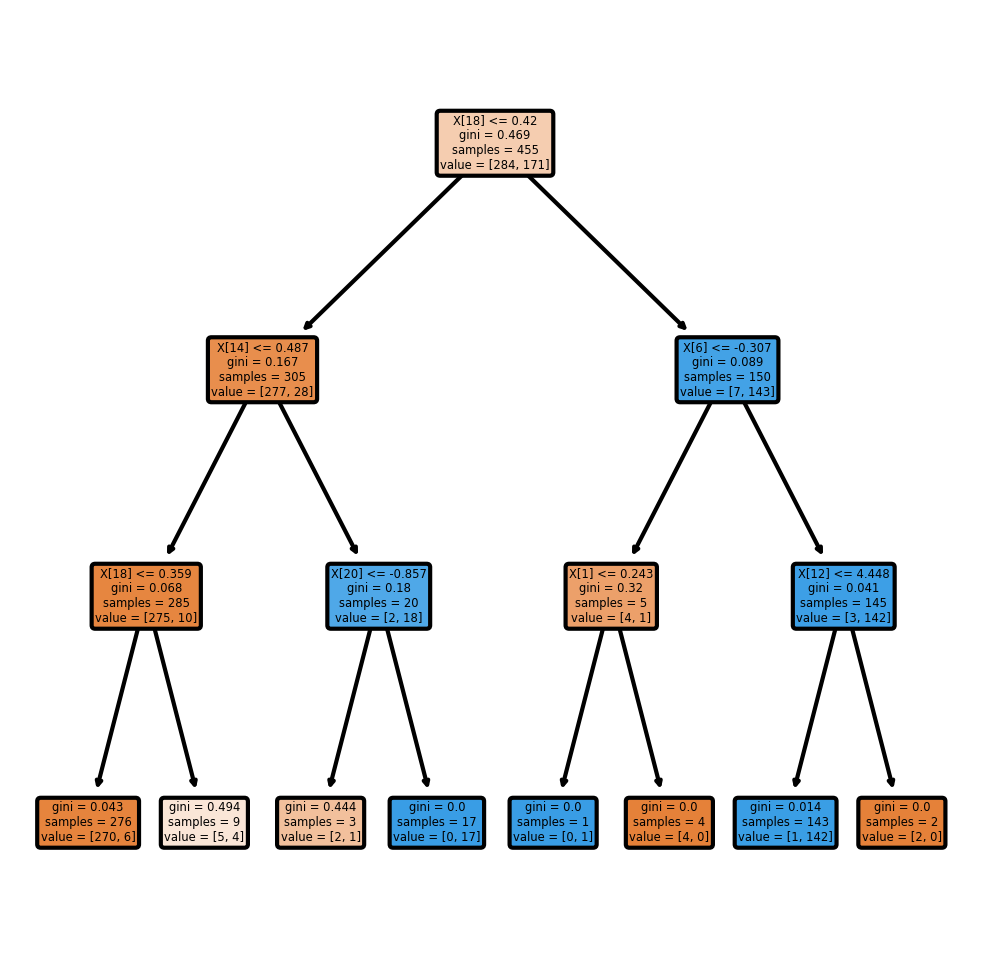

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(dt,filled = True, rounded=True)
plt.show()  

### Decision Tree GridSearchCV

In [40]:
dtr_mod = DecisionTreeClassifier(random_state=1123)

tree = GridSearchCV(dtr_mod,param_grid={'max_depth':list(range(4,9)),'min_samples_split':list(range(38,100))},scoring='recall')

tree.fit(X_train_rob_scaled,y_train)

tree.cv_results_

{'mean_fit_time': array([0.00733819, 0.00326867, 0.00327449, 0.00313826, 0.00303359,
        0.00315619, 0.00284119, 0.0031363 , 0.00363569, 0.00306358,
        0.0029511 , 0.0028841 , 0.00297985, 0.00315566, 0.00297227,
        0.00307016, 0.00348296, 0.00298448, 0.0029068 , 0.0032764 ,
        0.00282683, 0.0030952 , 0.00371547, 0.0046464 , 0.0044775 ,
        0.00436201, 0.00395241, 0.0028512 , 0.00319591, 0.00310159,
        0.00335021, 0.00302916, 0.00298872, 0.00300355, 0.00292263,
        0.00303187, 0.00285258, 0.00329576, 0.00310812, 0.00338039,
        0.00332294, 0.00368199, 0.00334382, 0.00298347, 0.00292654,
        0.00341897, 0.00298858, 0.00381546, 0.00314174, 0.00295248,
        0.00285115, 0.00316486, 0.00288382, 0.00310016, 0.00280733,
        0.00334964, 0.0031095 , 0.00300999, 0.00299435, 0.00292473,
        0.00314989, 0.00335846, 0.00341911, 0.00326977, 0.00315943,
        0.00305572, 0.00301156, 0.00299387, 0.00331602, 0.00336928,
        0.00295296, 0.00283089,

## Random Forest

### Random Forest with StandardScaler

,Error_metric,Train,Test
0,Accuracy,1.0,0.973684
1,Precision,1.0,0.975000
2,Recall,1.0,0.951220
3,Kappa,1.0,0.942560


Confusion matrix for the train set
[[284   0]
 [  0 171]]


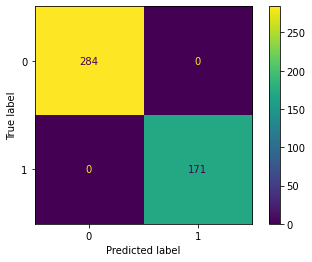



Confusion matrix for the test set
[[67  6]
 [ 4 37]]


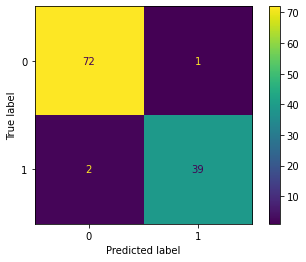

In [41]:
# clf = RandomForestClassifier() StandardScaler

# clf = RandomForestClassifier(n_estimators=700, max_depth = 13)
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train_stnd_scaled, y_train)

y_pred_train_clf_st = clf.predict(X_train_stnd_scaled)
y_pred_test_clf_st = clf.predict(X_test_stnd_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','Kappa'],
                               'Train': [accuracy_score(y_train, y_pred_train_clf_st),
                                         precision_score(y_train, y_pred_train_clf_st),
                                         recall_score(y_train, y_pred_train_clf_st),
                                         cohen_kappa_score(y_train, y_pred_train_clf_st)],
                               'Test': [accuracy_score(y_test, y_pred_test_clf_st),
                                        precision_score(y_test, y_pred_test_clf_st),
                                        recall_score(y_test, y_pred_test_clf_st),
                                        cohen_kappa_score(y_test, y_pred_test_clf_st)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train, y_pred_train_clf_st))
plot_confusion_matrix(clf, X_train_stnd_scaled, y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_dt_st))
plot_confusion_matrix(clf, X_test_stnd_scaled,y_test, values_format = 'd')
plt.show()

,Error_metric,Train,Test
0,Accuracy,1.0,0.982456
1,Precision,1.0,1.000000
2,Recall,1.0,0.951220
3,Kappa,1.0,0.961499


Confusion matrix for the train set
[[284   0]
 [  0 171]]


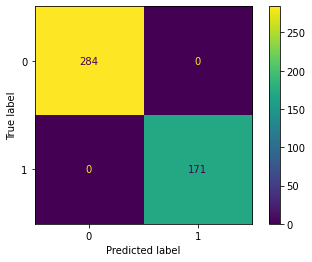



Confusion matrix for the test set
[[67  6]
 [ 4 37]]


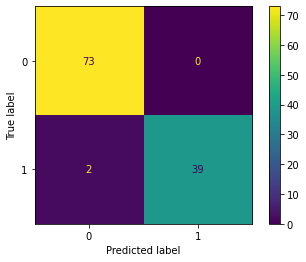

In [42]:
# clf = RandomForestClassifier() StandardScaler

clf = RandomForestClassifier(n_estimators=700, max_depth = 13)

clf.fit(X_train_stnd_scaled, y_train)

y_pred_train_clf_st = clf.predict(X_train_stnd_scaled)
y_pred_test_clf_st = clf.predict(X_test_stnd_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','Kappa'],
                               'Train': [accuracy_score(y_train, y_pred_train_clf_st),
                                         precision_score(y_train, y_pred_train_clf_st),
                                         recall_score(y_train, y_pred_train_clf_st),
                                         cohen_kappa_score(y_train, y_pred_train_clf_st)],
                               'Test': [accuracy_score(y_test, y_pred_test_clf_st),
                                        precision_score(y_test, y_pred_test_clf_st),
                                        recall_score(y_test, y_pred_test_clf_st),
                                        cohen_kappa_score(y_test, y_pred_test_clf_st)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train, y_pred_train_clf_st))
plot_confusion_matrix(clf, X_train_stnd_scaled, y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_dt_st))
plot_confusion_matrix(clf, X_test_stnd_scaled,y_test, values_format = 'd')
plt.show()

### Random Forest with RobustScaler

,Error_metric,Train,Test
0,Accuracy,1.0,0.964912
1,Precision,1.0,0.974359
2,Recall,1.0,0.926829
3,Kappa,1.0,0.922999


Confusion matrix for the train set
[[284   0]
 [  0 171]]


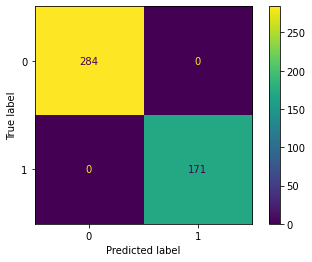



Confusion matrix for the test set
[[67  6]
 [ 4 37]]


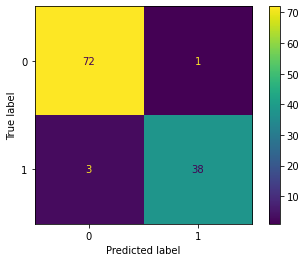

In [43]:
# clf = RandomForestClassifier() RobustScaler and n_estimators

# clf_rob = RandomForestClassifier(n_estimators=700, max_depth = 13)
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train_rob_scaled, y_train)

y_pred_train_clf_rob = clf.predict(X_train_rob_scaled)
y_pred_test_clf_rob = clf.predict(X_test_rob_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','Kappa'],
                               'Train': [accuracy_score(y_train, y_pred_train_clf_rob),
                                         precision_score(y_train, y_pred_train_clf_rob),
                                         recall_score(y_train, y_pred_train_clf_rob),
                                         cohen_kappa_score(y_train, y_pred_train_clf_rob)],
                               'Test': [accuracy_score(y_test, y_pred_test_clf_rob),
                                        precision_score(y_test, y_pred_test_clf_rob),
                                        recall_score(y_test, y_pred_test_clf_rob),
                                        cohen_kappa_score(y_test, y_pred_test_clf_rob)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train, y_pred_train_clf_rob))
plot_confusion_matrix(clf, X_train_rob_scaled, y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_dt_st))
plot_confusion_matrix(clf, X_test_rob_scaled, y_test, values_format = 'd')
plt.show()

,Error_metric,Train,Test
0,Accuracy,1.0,0.982456
1,Precision,1.0,1.000000
2,Recall,1.0,0.951220
3,Kappa,1.0,0.961499


Confusion matrix for the train set
[[284   0]
 [  0 171]]


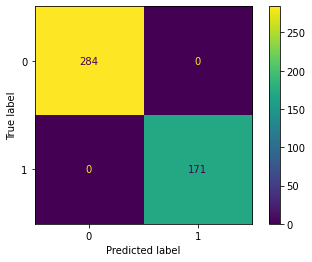



Confusion matrix for the test set
[[67  6]
 [ 4 37]]


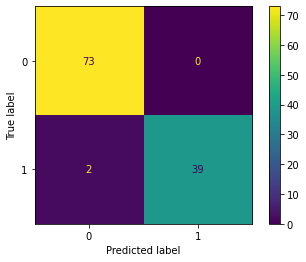

In [44]:
# clf = RandomForestClassifier() RobustScaler

clf_rob = RandomForestClassifier(n_estimators=700, max_depth = 13)

clf_rob.fit(X_train_rob_scaled, y_train)

y_pred_train_clf_rob = clf_rob.predict(X_train_rob_scaled)
y_pred_test_clf_rob = clf_rob.predict(X_test_rob_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','Kappa'],
                               'Train': [accuracy_score(y_train, y_pred_train_clf_rob),
                                         precision_score(y_train, y_pred_train_clf_rob),
                                         recall_score(y_train, y_pred_train_clf_rob),
                                         cohen_kappa_score(y_train, y_pred_train_clf_rob)],
                               'Test': [accuracy_score(y_test, y_pred_test_clf_rob),
                                        precision_score(y_test, y_pred_test_clf_rob),
                                        recall_score(y_test, y_pred_test_clf_rob),
                                        cohen_kappa_score(y_test, y_pred_test_clf_rob)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train, y_pred_train_clf_rob))
plot_confusion_matrix(clf_rob, X_train_rob_scaled, y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_dt_st))
plot_confusion_matrix(clf_rob, X_test_rob_scaled, y_test, values_format = 'd')
plt.show()

### Random Forest Gridsearch

In [45]:
# Build a classification task using 3 informative features

# rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

# param_grid = { 
#     'n_estimators': [200, 700],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': range(7,17,2)
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X, y)
# CV_rfc.best_params_


# Result -> {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 700}

In [46]:
pd.DataFrame({'feature': list(X_train.columns),'importance': clf_rob.feature_importances_}).sort_values('importance', ascending = False)

# FeatureImportance(clf_rob) if using definition

,feature,importance
14,area_worst,0.229230
18,concave points_worst,0.194879
6,area_se,0.114131
2,concavity_mean,0.108785
17,concavity_worst,0.085488
16,compactness_worst,0.039327
1,compactness_mean,0.032641
13,texture_worst,0.031254
9,concavity_se,0.025073
15,smoothness_worst,0.019584


## Conclusion

In [47]:
results = {'Model':['LogisticRegression StandardScaler'],'Recall Train':[np.round(recall_score(y_train, y_pred_train_log_std),3)],'Recall Test':[np.round(recall_score(y_test, y_pred_test_log_std),3)]}

results['Model'].append('LogisticRegression RobustScaler')
results['Recall Train'].append(np.round(recall_score(y_train, y_pred_train_log_rob),3))
results['Recall Test'].append(np.round(recall_score(y_test, y_pred_test_log_rob),3))

results['Model'].append('KNN StandardScaler')
results['Recall Train'].append(np.round(recall_score(y_train, y_pred_train_knn_st),3))
results['Recall Test'].append(np.round(recall_score(y_test, y_pred_test_knn_st),3))

results['Model'].append('KNN RobustScaler')
results['Recall Train'].append(np.round(recall_score(y_train, y_pred_train_knn_rob),3))
results['Recall Test'].append(np.round(recall_score(y_test, y_pred_test_knn_rob),3))

results['Model'].append('Decision Tree StandardScaler')
results['Recall Train'].append(np.round(recall_score(y_train, y_pred_train_dt_st),3))
results['Recall Test'].append(np.round(recall_score(y_test, y_pred_test_dt_st),3))

results['Model'].append('Decision Tree RobustScaler')
results['Recall Train'].append(np.round(recall_score(y_train, y_pred_train_dt_rob),3))
results['Recall Test'].append(np.round(recall_score(y_test, y_pred_test_dt_rob),3))

results['Model'].append('RandomForest StandardScaler')
results['Recall Train'].append(np.round(recall_score(y_train, y_pred_train_clf_st),3))
results['Recall Test'].append(np.round(recall_score(y_test, y_pred_test_clf_st),3))

results['Model'].append('RandomForest RobustScaler')
results['Recall Train'].append(np.round(recall_score(y_train, y_pred_train_clf_rob),3))
results['Recall Test'].append(np.round(recall_score(y_test, y_pred_test_clf_rob),3))


In [48]:
pd.DataFrame(results).sort_values('Recall Test', ascending = False)

,Model,Recall Train,Recall Test
0,LogisticRegression StandardScaler,0.977,0.951
1,LogisticRegression RobustScaler,0.977,0.951
6,RandomForest StandardScaler,1.000,0.951
7,RandomForest RobustScaler,1.000,0.951
2,KNN StandardScaler,0.912,0.902
3,KNN RobustScaler,0.918,0.902
4,Decision Tree StandardScaler,0.936,0.902
5,Decision Tree RobustScaler,0.936,0.878
